In [1]:
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines
from libra_toolbox.tritium.model import (
    quantity_to_activity,
    activity_to_quantity,
)
from libra_toolbox.tritium.plotting import (
    ureg,
    plot_bars,
    plot_integrated_top_release,
    plot_integrated_wall_release,
    plot_irradiation,
    plot_sample_activity_top,
    plot_sample_activity_wall,
    plot_salt_inventory,
    plot_top_release,
    plot_wall_release,
)

# Save original plot_bars under a new name to keep it unchanged
plot_bars_original = plot_bars

# Define a wrapper that allows passing an ax
def plot_bars_ax(measurements, index=None, bar_width=0.35, stacked=True, ax=None):
    import matplotlib.pyplot as plt

    if ax is None:
        return plot_bars_original(measurements, index, bar_width, stacked)
    else:
        # Patch plt.bar to call ax.bar inside this function call
        original_bar = plt.bar

        def patched_bar(*args, **kwargs):
            return ax.bar(*args, **kwargs)

        plt.bar = patched_bar

        result = plot_bars_original(measurements, index, bar_width, stacked)

        # Restore original plt.bar
        plt.bar = original_bar

        return result

ureg.mpl_formatter = "{:~P}"
# remove top and right axes by default
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
# set axis below true by default
plt.rcParams["axes.axisbelow"] = True

from tritium_model import *
import tritium_model_run1 as bm_run1

/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/libra_toolbox/tritium/lsc_measurements.py:140: UserWarning: Activity of 1L-IV_3-1-1 is negative after substracting background. Setting to zero.
  warnings.warn(
/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/libra_toolbox/tritium/lsc_measurements.py:140: UserWarning: Activity of 1L-IV_3-1-2 is negative after substracting background. Setting to zero.
  warnings.warn(
/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/libra_toolbox/tritium/lsc_measurements.py:140: UserWarning: Activity of 1L-IV_3-1-4 is negative after substracting background. Setting to zero.
  warnings.warn(
/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/libra_toolbox/tritium/lsc_measurements.py:140: UserWarning: Activity of 1L-IV_3-3-1 is negative after substracting background. Setting to zero.
  warnings.warn(
/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/libra_toolbox/tritium/lsc_measurements.py:140: UserWarning: A

Processed data stored in ../../data/processed_data.json
Processed data stored in ../../data/processed_data_run1.json


/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/libra_toolbox/tritium/lsc_measurements.py:140: UserWarning: Activity of IV-1-5-1 is negative after substracting background. Setting to zero.
  warnings.warn(
/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/libra_toolbox/tritium/lsc_measurements.py:140: UserWarning: Activity of IV-1-5-2 is negative after substracting background. Setting to zero.
  warnings.warn(
/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/libra_toolbox/tritium/lsc_measurements.py:140: UserWarning: Activity of IV 1-6-1 is negative after substracting background. Setting to zero.
  warnings.warn(
/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/libra_toolbox/tritium/lsc_measurements.py:140: UserWarning: Activity of IV 1-7-1 is negative after substracting background. Setting to zero.
  warnings.warn(
/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/libra_toolbox/tritium/lsc_measurements.py:140: UserWarning: Activity of I

Quantity of T consumed: 4.09×10¹² particle
Uncertainty on T consumed: 4.09×10¹¹ particle
Quantity of T consumed: 7.31×10³ Bq
Quantity of T produced: 2.97×10¹ Bq
Quantity of T produced: 1.66×10¹⁰ particle
Measured TBR: 4.05e-03 particle / neutron
0.5032146732605454 dimensionless


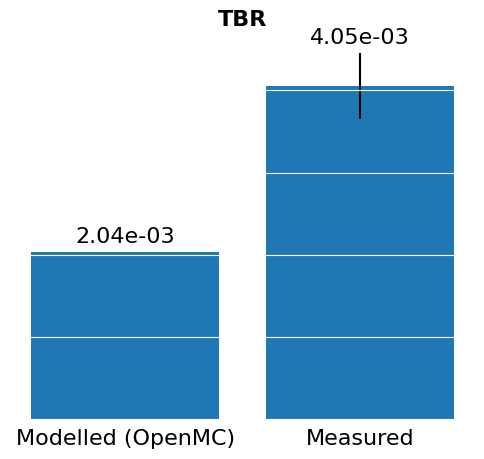

In [2]:
print(f"Quantity of T consumed: {T_consumed.to(ureg.particle):.2e~P}")
print(
    f"Uncertainty on T consumed: {(neutron_rate_relative_uncertainty * T_consumed).to(ureg.particle):.2e~P}"
)
print(f"Quantity of T consumed: {quantity_to_activity(T_consumed).to(ureg.Bq):.2e~P}")
print(f"Quantity of T produced: {T_produced:.2e~P}")
print(
    f"Quantity of T produced: {activity_to_quantity(T_produced).to(ureg.particle):.2e~P}"
)
print(f"Measured TBR: {measured_TBR:.2e}")
plt.figure(figsize=(6, 5))
bars = plt.bar(
    [0, 1],
    [calculated_TBR, measured_TBR],
    tick_label=["Modelled (OpenMC)", "Measured"],
    yerr=[0, neutron_rate_relative_uncertainty * measured_TBR],
)

plt.bar_label(bars, fontsize=16, fmt="%.2e", padding=3)
plt.title("TBR", weight="bold", fontsize=16)
plt.ylabel("")
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels
plt.gca().tick_params(axis="both", which="both", left=False, bottom=False, labelsize=16)
plt.gca().set_axisbelow(False)
plt.grid(axis="y", alpha=1, color="white", zorder=-10)
# plt.tight_layout()
print((calculated_TBR / measured_TBR).to(ureg.dimensionless))
plt.savefig("tbr_comparison.pdf", bbox_inches="tight")
plt.show()

In [3]:
baby_model.run(50 * ureg.day)

/home/codespace/.local/lib/python3.12/site-packages/scipy/integrate/_ivp/base.py:23: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(fun(t, y), dtype=dtype)


In [4]:
import requests

# Load Run 4 processed data
url_run4 = "https://raw.githubusercontent.com/veliki-filozof/baby-1L-run-4/refs/heads/tfg-processing/data/processed_data.json"
run4_data = requests.get(url_run4).json()

from libra_toolbox.tritium.model import Model

# Build irradiations list using shared ureg
irradiations_run4 = [
    (
        entry["start_time"]["value"] * ureg(entry["start_time"]["unit"]),
        entry["stop_time"]["value"] * ureg(entry["stop_time"]["unit"]),
    )
    for entry in run4_data["irradiations"]
]

# Extract Run 4 cumulative measured data
run4_days = run4_data["cumulative_tritium_release"]["IV"]["sampling_times"]["value"]
run4_top_release = run4_data["cumulative_tritium_release"]["IV"]["total"]["value"]


# Construct Run 4 model
baby_model_run4 = Model(
    radius=run4_data["modelled_baby_radius"]["value"] * ureg(run4_data["modelled_baby_radius"]["unit"]),
    height=run4_data["modelled_baby_height"]["value"] * ureg(run4_data["modelled_baby_height"]["unit"]),
    TBR=run4_data["TBR_used_in_model"]["value"],
    neutron_rate=run4_data["neutron_rate_used_in_model"]["value"] * ureg(run4_data["neutron_rate_used_in_model"]["unit"]),
    irradiations=irradiations_run4,
    k_top=run4_data["k_top"]["value"] * ureg(run4_data["k_top"]["unit"]),
    k_wall=run4_data["k_wall"]["value"] * ureg(run4_data["k_wall"]["unit"]),
)

# Run the model
baby_model_run4.run(30 * ureg.day)

/home/codespace/.local/lib/python3.12/site-packages/scipy/integrate/_ivp/base.py:23: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(fun(t, y), dtype=dtype)


In [5]:
# Load Run 1 processed data
url_run1 = "https://raw.githubusercontent.com/LIBRA-project/BABY-1L-run-1/refs/heads/main/data/processed_data.json"
run1_data = requests.get(url_run1).json()

# Build irradiations list using shared ureg
irradiations_run1 = [
    (
        entry["start_time"]["value"] * ureg(entry["start_time"]["unit"]),
        entry["stop_time"]["value"] * ureg(entry["stop_time"]["unit"]),
    )
    for entry in run1_data["irradiations"]
]

# Extract Run 1 cumulative measured data
run1_days = run1_data["cumulative_tritium_release"]["IV"]["sampling_times"]["value"]
run1_top_release = run1_data["cumulative_tritium_release"]["IV"]["total"]["value"]

# Construct Run 1 model
baby_model_run1 = Model(
    radius=run1_data["modelled_baby_radius"]["value"] * ureg(run1_data["modelled_baby_radius"]["unit"]),
    height=run1_data["modelled_baby_height"]["value"] * ureg(run1_data["modelled_baby_height"]["unit"]),
    TBR=run1_data["TBR_used_in_model"]["value"],
    neutron_rate=run1_data["neutron_rate_used_in_model"]["value"] * ureg(run1_data["neutron_rate_used_in_model"]["unit"]),
    irradiations=irradiations_run1,
    k_top=run1_data["k_top"]["value"] * ureg(run1_data["k_top"]["unit"]),
    k_wall=run1_data["k_wall"]["value"] * ureg(run1_data["k_wall"]["unit"]),
)

# Run the model
baby_model_run1.run(70 * ureg.day)


In [6]:
print(f"Transport:")
print(f"  mass transport coeff top: {baby_model.k_top:.2e~P}")
print(f"  mass transport coeff wall: {baby_model.k_wall:.2e~P}")

print("Source:")
print(f"  TBR: {baby_model.TBR:.2e~P}")
print(f"  neutron rate: {baby_model.neutron_rate:.2e~P}")
print(f"  neutron rate * TBR: {baby_model.neutron_rate * baby_model.TBR:.2e~P}")
# print(f"  k_top/k_wall: {baby_model.k_top/baby_model.k_wall:.2f~P}")

print("Geometry:")
print(f"  volume: {baby_model.volume.to(ureg.cm**3):.2f~P}")
print(f"  top area: {baby_model.A_top.to(ureg.cm**2):.2f~P}")
print(f"  wall area: {baby_model.A_wall.to(ureg.cm**2):.2f~P}")

Transport:
  mass transport coeff top: 1.29×10⁻⁷ m/s
  mass transport coeff wall: 0.00×10⁰ m/s
Source:
  TBR: 2.04×10⁻³ particle/n
  neutron rate: 1.04×10⁸ n/s
  neutron rate * TBR: 2.13×10⁵ particle/s
Geometry:
  volume: 1000.00 cm³
  top area: 153.94 cm²
  wall area: 445.87 cm²


In [7]:
import matplotlib as mpl

mpl.rcParams.update({
    "font.size": 14,        # Default text
    "axes.titlesize": 16,   # Plot titles
    "axes.labelsize": 14,   # Axis labels
    "xtick.labelsize": 14,  # X tick labels
    "ytick.labelsize": 14,  # Y tick labels
    "legend.fontsize": 14,  # Legend
})

27.01126682237793 day


/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/labellines/core.py:162: UserWarning: Tried to label line Line2D(_child0), but could not find a label for it.
  warnings.warn(
/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/labellines/core.py:162: UserWarning: Tried to label line Line2D(_child3), but could not find a label for it.
  warnings.warn(
/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/labellines/core.py:162: UserWarning: Tried to label line Line2D(_child4), but could not find a label for it.
  warnings.warn(


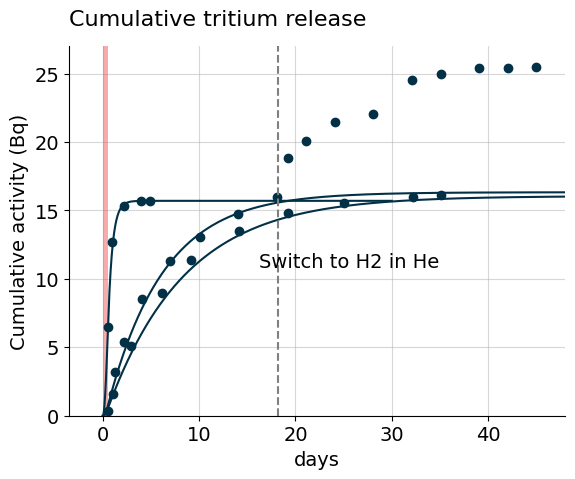

In [8]:
plt.figure()
(l,) = plot_integrated_top_release(baby_model, color="#023047")
# plot_integrated_wall_release(baby_model, color="tab:green", label="Wall")
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)

plot_integrated_top_release(baby_model_run4, color="#023047")
# plot_integrated_wall_release(baby_model_run4, color="tab:green", label="Wall")
# plot_irradiation(baby_model_run4, facecolor="#EF5B5B", alpha=0.5)

plot_integrated_top_release(baby_model_run1, color="#023047")
# plot_integrated_wall_release(baby_model_run1, color="tab:green", label="Wall")
# plot_irradiation(baby_model_run1, facecolor="#EF5B5B", alpha=0.5)

plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[45] * 2)
plt.ylim(bottom=0 * ureg.Bq)

plt.scatter(
    replacement_times_top, IV_stream.get_cumulative_activity("total"), color="#023047"
)
# plt.scatter(
#    replacement_times_walls,
#    OV_stream.get_cumulative_activity("total"),
#    color="tab:green",
#)

# Plot measured
plt.scatter(run4_days, run4_top_release, color="#023047", label="Run 4 Measured (Top)")

plt.scatter(run1_days, run1_top_release, color="#023047", label="Run 1 Measured (Top)")

# add line where top is 99% of final
ydata = l.get_ydata()
xdata = l.get_xdata()
target_release_frac = 0.99
x_target = xdata[np.argmax(ydata > target_release_frac * ydata[-1])]
print(f'{x_target}')
# plt.axvline(x=x_target, color="k", linestyle="--")
plt.axvline(x=gas_switch_deltatime, color="grey", linestyle="--")
#plt.annotate(
#    f"99% of steady state \n {x_target: .0f}",
#    (x_target, target_release_frac * ydata[-1]),
#    xytext=(0, 20),
#    textcoords="offset points",
#    ha="center",
#    va="bottom",
#    color="k",
#)
plt.annotate(
    f"Switch to H2 in He",
    (x_target, target_release_frac * ydata[-1]),
    xytext=(-10, -55),
    textcoords="offset points",
    ha="center",
    va="bottom",
    color="black",
)

plt.title("Cumulative tritium release", loc="left", pad = 15)
plt.ylim(top=27)
plt.xlim(right = 48)
plt.xlabel("days")
plt.ylabel("Cumulative activity (Bq)")

plt.savefig("cumulative_release.pdf", bbox_inches="tight")

27.01126682237793 day


/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/labellines/core.py:162: UserWarning: Tried to label line Line2D(_child3), but could not find a label for it.
  warnings.warn(


Text(0, 0.5, 'Cumulative activity (Bq)')

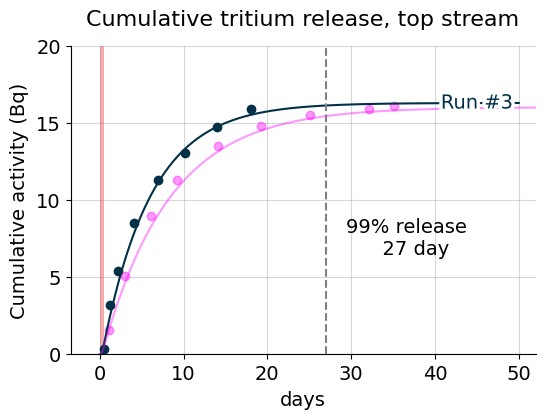

In [9]:
plt.figure(figsize = (6,4))
(l,) = plot_integrated_top_release(baby_model, color="#023047", label = "Run #3")
# plot_integrated_wall_release(baby_model, color="tab:green", label="Wall")
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)

# plot_integrated_top_release(baby_model_run4, color="#023047")
# plot_integrated_wall_release(baby_model_run4, color="tab:green", label="Wall")
# plot_irradiation(baby_model_run4, facecolor="#EF5B5B", alpha=0.5)

plot_integrated_top_release(baby_model_run1, color="magenta", alpha = 0.4)
# plot_integrated_wall_release(baby_model_run1, color="tab:green", label="Wall")
# plot_irradiation(baby_model_run1, facecolor="#EF5B5B", alpha=0.5)

plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[45] * 2)
plt.ylim(bottom=0 * ureg.Bq)

replacement_times_top_conv = np.array([t.to(ureg.day).magnitude for t in replacement_times_top])
mask = replacement_times_top_conv < 19
plt.scatter(
    replacement_times_top_conv[mask], IV_stream.get_cumulative_activity("total")[mask], color="#023047"
)
#plt.scatter(
#    replacement_times_walls,
#    OV_stream.get_cumulative_activity("total"),
#    color="tab:green",
#)

# Plot measured
#plt.scatter(run4_days, run4_top_release, color="#023047", label="Run 4 Measured (Top)")

plt.scatter(run1_days, run1_top_release, color="magenta", label="Run 1 Measured (Top)", alpha = 0.4)

# add line where top is 99% of final
ydata = l.get_ydata()
xdata = l.get_xdata()
target_release_frac = 0.99
x_target = xdata[np.argmax(ydata > target_release_frac * ydata[-1])]
print(f'{x_target}')
plt.axvline(x=x_target, color="grey", linestyle="--")
plt.annotate(
    f"99% release \n {x_target: .0f}",
    (x_target, target_release_frac * ydata[-1]),
    xytext=(60, -110),
    textcoords="offset points",
    ha="center",
    va="bottom",
    color="k",
    fontsize=14
)

plt.title("Cumulative tritium release, top stream", loc="center", pad = 15)
plt.ylim(top=20)
plt.xlim(right = 52)
plt.yticks(np.arange(0, 25, 5))  # Start at 0, end before 25, step by 5
plt.xlabel("days", labelpad = 5)
plt.ylabel("Cumulative activity (Bq)", labelpad = 5)


/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/labellines/core.py:162: UserWarning: Tried to label line Line2D(_child0), but could not find a label for it.
  warnings.warn(


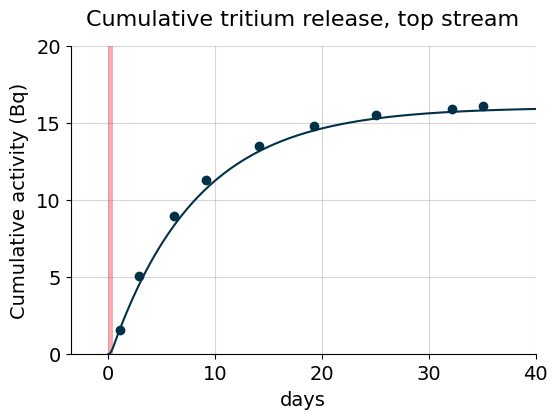

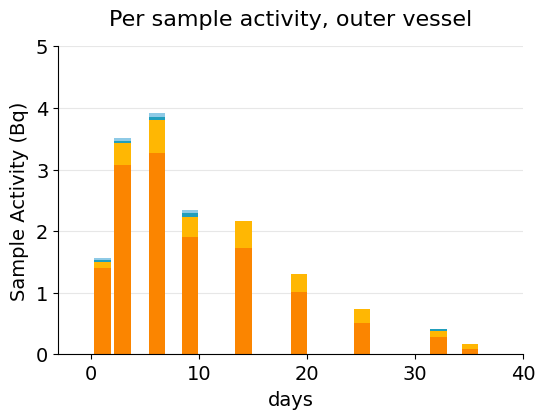

In [10]:
plt.figure(figsize = (6,4))
(l,) = plot_integrated_top_release(baby_model_run1, color="#023047")
plot_irradiation(baby_model_run1, facecolor="#EF5B5B", alpha=0.5)

plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[45] * 2)
plt.ylim(bottom=0 * ureg.Bq)

plt.scatter(run1_days, run1_top_release, color="#023047", label="Run 1 Measured (Top)")

plt.title("Cumulative tritium release, top stream", loc="center", pad = 15)
plt.ylim(top=20)
plt.xlim(right = 40)
plt.yticks(np.arange(0, 25, 5))  # Start at 0, end before 25, step by 5
plt.xlabel("days", labelpad = 5)
plt.ylabel("Cumulative activity (Bq)", labelpad = 5)

plt.figure(figsize = (6,4))
plot_bars(bm_run1.IV_stream, index=[time.to(ureg.day) for time in bm_run1.replacement_times_top], bar_width = 1.5)

plt.grid(True, axis="y", alpha=0.3)
# plt.ylim(bottom=0 * ureg.Bq)
plt.xlim(0, 48)
plt.ylabel("Sample Activity (Bq)", labelpad = 5)
plt.xlabel("days", labelpad = 5)
plt.title("Per sample activity, outer vessel", loc = 'center', pad = 15)

plt.ylim(top=5)
plt.xlim(left=-3, right = 40)

plt.show()

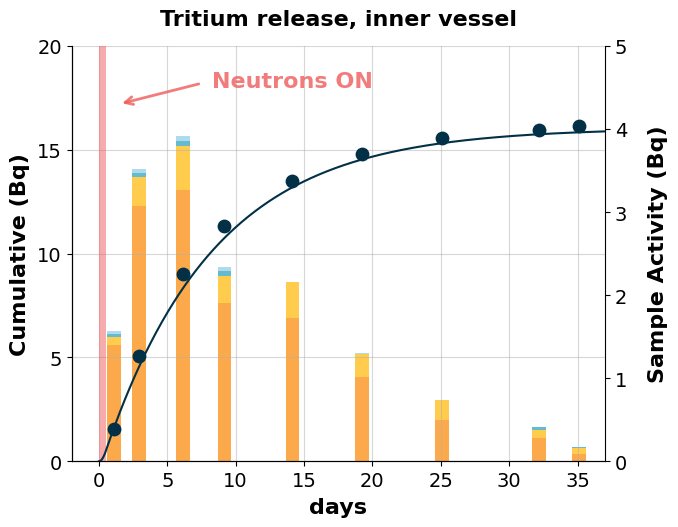

In [11]:
fig, ax1 = plt.subplots(figsize=(7, 5.5))
ax2 = ax1.twinx()

# Plot bars on ax2 explicitly with your wrapper
plot_bars_ax(
    bm_run1.IV_stream,
    index=[time.to(ureg.day).magnitude for time in bm_run1.replacement_times_top],
    bar_width=1,
    ax=ax2,
)

for bar in ax2.patches:
    bar.set_zorder(0)
    bar.set_alpha(0.7)

ax2.set_zorder(1)
ax1.set_zorder(2)
ax1.patch.set_visible(False)

# Plot lines on ax1 by setting current axis
plt.sca(ax1)
plot_integrated_top_release(baby_model_run1, color="#023047", zorder=3)
plot_irradiation(baby_model_run1, facecolor="#EF5B5B", alpha=0.5, zorder=2)

ax1.scatter(run1_days, run1_top_release, s=80,  color="#023047", label="Run 1 Measured (Top)", zorder=4)

ax2.set_ylabel("Sample Activity (Bq)", labelpad=15, fontsize=16, weight='bold')
ax2.set_ylim(top=5)
ax2.set_xlim(left=-2, right=37)
ax2.tick_params(axis="y", labelcolor="black")
ax2.spines["right"].set_visible(True)

ax1.set_title("Tritium release, inner vessel", loc="center", pad=15, fontsize=16, weight='bold')
ax1.set_xlabel("days", labelpad=5, fontsize=16, weight='bold')
ax1.set_ylabel("Cumulative (Bq)", labelpad=5, fontsize=16, weight='bold')
ax1.set_ylim(0, 20)
ax1.set_xlim(-2, 37)
ax1.set_yticks(np.arange(0, 25, 5))
ax1.grid(alpha=0.5)

labelLines(ax1.get_lines(), zorder=5, xvals=[30] * 2)

# Coordinates for the arrow and text – tweak as needed
arrow_x = 1.5   # x-coordinate of the arrow base
arrow_y = 17.2   # y-coordinate of the arrow base
label_x = 8.3   # x-coordinate for the text label
label_y = 18   # y-coordinate for the text label
irr_color = "#EF5B5B"
irr_alpha = 0.8

# Add arrow pointing to the irradiation bar
ax1.annotate(
    "",  # no text
    xy=(arrow_x, arrow_y),  # target point on the bar
    xytext=(arrow_x+6, arrow_y+1),  # arrow tail
    arrowprops=dict(
        arrowstyle="->",
        color=irr_color,
        alpha=irr_alpha,
        linewidth=2
    ),
    zorder=5
)


# Add "Neutrons ON" label
ax1.text(
    label_x, label_y,
    "Neutrons ON",
    color=irr_color,
    alpha=0.8,
    fontsize=16,
    weight='bold',
    zorder=5
)


plt.tight_layout()
fig.savefig("Tritium release IV run 1.svg", format="svg", dpi=300)
plt.show()


2.42980758536314 day


/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/labellines/core.py:162: UserWarning: Tried to label line Line2D(_child5), but could not find a label for it.
  warnings.warn(
/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/labellines/core.py:228: UserWarning: The value at position 0 in `xvals` is outside the range of its associated line (xmin=np.float64(0.0), xmax=np.float64(29.999999999999993), xval=45). Clipping it into the allowed range.
  warnings.warn(


Text(0, 0.5, 'Cumulative activity (Bq)')

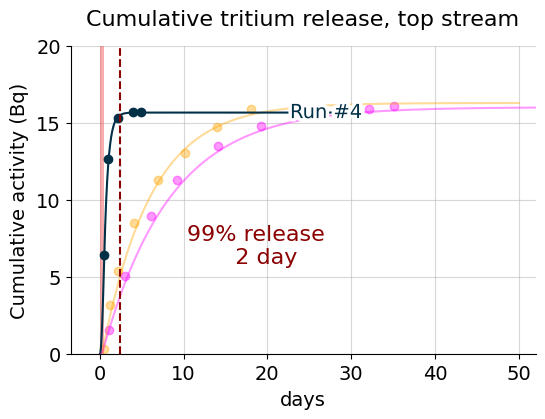

In [12]:
plt.figure(figsize = (6,4))
plot_integrated_top_release(baby_model, color="orange", alpha = 0.4)
# plot_integrated_wall_release(baby_model, color="tab:green", label="Wall")
# plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)

(l,) = plot_integrated_top_release(baby_model_run4, color="#023047", label = 'Run #4')
# plot_integrated_wall_release(baby_model_run4, color="tab:green", label="Wall")
plot_irradiation(baby_model_run4, facecolor="#EF5B5B", alpha=0.5)

plot_integrated_top_release(baby_model_run1, color="magenta", alpha = 0.4)
# plot_integrated_wall_release(baby_model_run1, color="tab:green", label="Wall")
# plot_irradiation(baby_model_run1, facecolor="#EF5B5B", alpha=0.5)

plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[45] * 2)
plt.ylim(bottom=0 * ureg.Bq)

replacement_times_top_conv = np.array([t.to(ureg.day).magnitude for t in replacement_times_top])
mask = replacement_times_top_conv < 19
plt.scatter(
    replacement_times_top_conv[mask], IV_stream.get_cumulative_activity("total")[mask], color="orange", alpha = 0.4
)
#plt.scatter(
#    replacement_times_walls,
#    OV_stream.get_cumulative_activity("total"),
#    color="tab:green",
#)

# Plot measured
plt.scatter(run4_days, run4_top_release, color="#023047", label="Run 4 Measured (Top)")

plt.scatter(run1_days, run1_top_release, color="magenta", label="Run 1 Measured (Top)", alpha = 0.4)

# add line where top is 99% of final
ydata = l.get_ydata()
xdata = l.get_xdata()
target_release_frac = 0.99
x_target = xdata[np.argmax(ydata > target_release_frac * ydata[-1])]
print(f'{x_target}')
plt.axvline(x=x_target, color="darkred", linestyle="--")
plt.annotate(
    f"99% release \n {x_target: .0f}",
    (x_target, target_release_frac * ydata[-1]),
    xytext=(100, -110),
    textcoords="offset points",
    ha="center",
    va="bottom",
    color="darkred",
    fontsize=16
)

plt.title("Cumulative tritium release, top stream", loc="center", pad = 15)
plt.ylim(top=20)
plt.xlim(right = 52)
plt.yticks(np.arange(0, 25, 5))  # Start at 0, end before 25, step by 5
plt.xlabel("days", labelpad = 5)
plt.ylabel("Cumulative activity (Bq)", labelpad = 5)


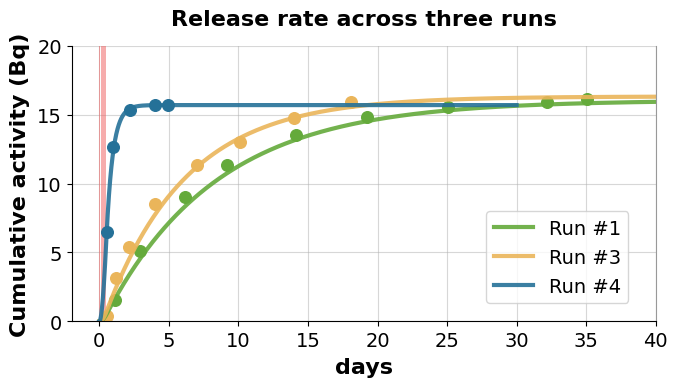

In [34]:
plt.close('all')

fig, ax = plt.subplots(figsize=(7, 4.1))
plt.sca(ax)  # Set current axis for custom plotting functions

color_run1="#64AA3B"
color_run3="#EAB55A"
color_run4="#257198"

# Plot release data
plot_integrated_top_release(baby_model_run1, color=color_run1, label="Run #1",alpha=0.9, linewidth=3)
plot_integrated_top_release(baby_model, color=color_run3, label="Run #3",alpha=0.9, linewidth=3)
plot_integrated_top_release(baby_model_run4, color=color_run4, label="Run #4", alpha=0.9, linewidth=3)
plot_irradiation(baby_model_run4, facecolor="#EF5B5B", alpha=0.5)


ax.scatter(run1_days, run1_top_release, color=color_run1, alpha=1, s=70)

# Replacement times and cumulative activity
replacement_times_top_conv = np.array([t.to(ureg.day).magnitude for t in replacement_times_top])
mask = replacement_times_top_conv < 19
ax.scatter(
    replacement_times_top_conv[mask],
    IV_stream.get_cumulative_activity("total")[mask],
    color=color_run3,
    alpha=1,
    s=70,
)

# Measured data points
ax.scatter(run4_days, run4_top_release, color=color_run4, alpha=1, s=70)

# Styling
ax.grid(alpha=0.5)
ax.set_ylim(0, 20)
ax.set_xlim(left=-2,right=40)
ax.set_yticks(np.arange(0, 25, 5))
ax.set_xlabel("days", labelpad=5, fontsize=16, weight='bold')
ax.set_ylabel("Cumulative activity (Bq)", labelpad=5, fontsize=16, weight='bold')
ax.set_title("Release rate across three runs", loc="center", pad=15, fontsize=16, weight='bold')

# Legend
ax.legend(loc='lower right', bbox_to_anchor=(0.97, 0.03), prop={'size': 14})

# Right spine
ax.spines['right'].set_visible(True)
ax.spines['right'].set_color('gray')
ax.spines['right'].set_alpha(0.8)

# Save and show
fig.tight_layout()
fig.savefig("Tritium Release Across Runs.svg", format="svg", dpi=300, transparent=True)
plt.show()


27.01126682237793 day


Text(0, 0.5, 'Cumulative activity (Bq)')

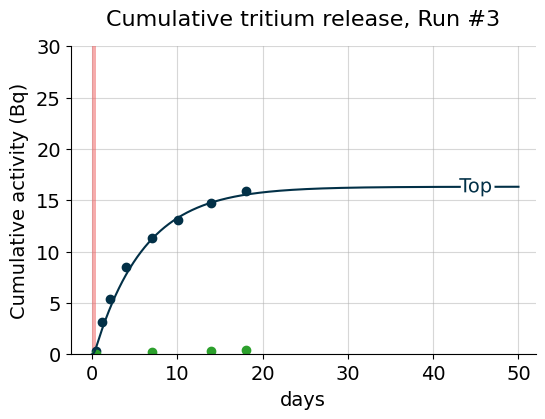

In [14]:
plt.figure(figsize = (6,4))
(l,) = plot_integrated_top_release(baby_model, color="#023047", label = "Top")
# plot_integrated_wall_release(baby_model, color="tab:green", label="Wall")
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)

# plot_integrated_top_release(baby_model_run4, color="#023047")
# plot_integrated_wall_release(baby_model_run4, color="tab:green", label="Wall")
# plot_irradiation(baby_model_run4, facecolor="#EF5B5B", alpha=0.5)

# plot_integrated_top_release(baby_model_run1, color="magenta", alpha = 0.4)
# plot_integrated_wall_release(baby_model_run1, color="tab:green", label="Wall")
# plot_irradiation(baby_model_run1, facecolor="#EF5B5B", alpha=0.5)

plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[45] * 2)
plt.ylim(bottom=0 * ureg.Bq)

replacement_times_top_conv = np.array([t.to(ureg.day).magnitude for t in replacement_times_top])
mask = replacement_times_top_conv < 19
plt.scatter(
    replacement_times_top_conv[mask], IV_stream.get_cumulative_activity("total")[mask], color="#023047"
)
replacement_times_walls_conv = np.array([t.to(ureg.day).magnitude for t in replacement_times_walls])
mask_walls = replacement_times_walls_conv < 19
plt.scatter(
    replacement_times_walls_conv[mask_walls],
    OV_stream.get_cumulative_activity("total")[mask_walls],
    color="tab:green",
)

# Plot measured
#plt.scatter(run4_days, run4_top_release, color="#023047", label="Run 4 Measured (Top)")

# plt.scatter(run1_days, run1_top_release, color="magenta", label="Run 1 Measured (Top)", alpha = 0.4)

ydata = l.get_ydata()
xdata = l.get_xdata()
target_release_frac = 0.99
x_target = xdata[np.argmax(ydata > target_release_frac * ydata[-1])]
print(f'{x_target}')
# plt.axvline(x=x_target, color="k", linestyle="--")
#plt.axvline(x=gas_switch_deltatime, color="grey", linestyle="--")
#plt.annotate(
#    f"99% of steady state \n {x_target: .0f}",
#    (x_target, target_release_frac * ydata[-1]),
#    xytext=(0, 20),
#    textcoords="offset points",
#    ha="center",
#    va="bottom",
#    color="k",
#)
#plt.annotate(
#    f"Switch to H2 in He",
#    (x_target, target_release_frac * ydata[-1]),
#    xytext=(-10, -55),
#    textcoords="offset points",
#    ha="center",
#    va="bottom",
#    color="black",
#)

plt.title("Cumulative tritium release, Run #3", loc="center", pad = 15)
plt.ylim(top=30)
plt.xlim(right = 52)
plt.yticks(np.arange(0, 35, 5))  # Start at 0, end before 25, step by 5
plt.xlabel("days", labelpad = 5)
plt.ylabel("Cumulative activity (Bq)", labelpad = 5)

27.01126682237793 day


Text(0, 0.5, 'Cumulative activity (Bq)')

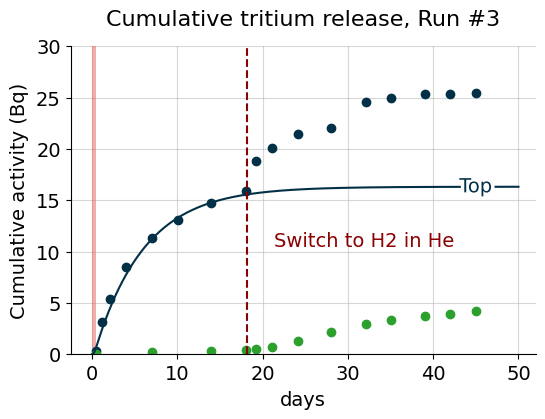

In [15]:
plt.figure(figsize = (6,4))
(l,) = plot_integrated_top_release(baby_model, color="#023047", label = "Top")
# plot_integrated_wall_release(baby_model, color="tab:green", label="Wall")
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)

# plot_integrated_top_release(baby_model_run4, color="#023047")
# plot_integrated_wall_release(baby_model_run4, color="tab:green", label="Wall")
# plot_irradiation(baby_model_run4, facecolor="#EF5B5B", alpha=0.5)

# plot_integrated_top_release(baby_model_run1, color="magenta", alpha = 0.4)
# plot_integrated_wall_release(baby_model_run1, color="tab:green", label="Wall")
# plot_irradiation(baby_model_run1, facecolor="#EF5B5B", alpha=0.5)

plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[45] * 2)
plt.ylim(bottom=0 * ureg.Bq)

plt.scatter(
    replacement_times_top, IV_stream.get_cumulative_activity("total"), color="#023047"
)
plt.scatter(
    replacement_times_walls,
    OV_stream.get_cumulative_activity("total"),
    color="tab:green",
)

# Plot measured
#plt.scatter(run4_days, run4_top_release, color="#023047", label="Run 4 Measured (Top)")

# plt.scatter(run1_days, run1_top_release, color="magenta", label="Run 1 Measured (Top)", alpha = 0.4)

ydata = l.get_ydata()
xdata = l.get_xdata()
target_release_frac = 0.99
x_target = xdata[np.argmax(ydata > target_release_frac * ydata[-1])]
print(f'{x_target}')
# plt.axvline(x=x_target, color="k", linestyle="--")
plt.axvline(x=gas_switch_deltatime, color="darkred", linestyle="--")
#plt.annotate(
#    f"99% of steady state \n {x_target: .0f}",
#    (x_target, target_release_frac * ydata[-1]),
#    xytext=(0, 20),
#    textcoords="offset points",
#    ha="center",
#    va="bottom",
#    color="k",
#)
plt.annotate(
    f"Switch to H2 in He",
    (x_target, target_release_frac * ydata[-1]),
    xytext=(30, -45),
    textcoords="offset points",
    ha="center",
    va="bottom",
    color="darkred",
)

plt.title("Cumulative tritium release, Run #3", loc="center", pad = 15)
plt.ylim(top=30)
plt.xlim(right = 52)
plt.yticks(np.arange(0, 35, 5))  # Start at 0, end before 25, step by 5
plt.xlabel("days", labelpad = 5)
plt.ylabel("Cumulative activity (Bq)", labelpad = 5)

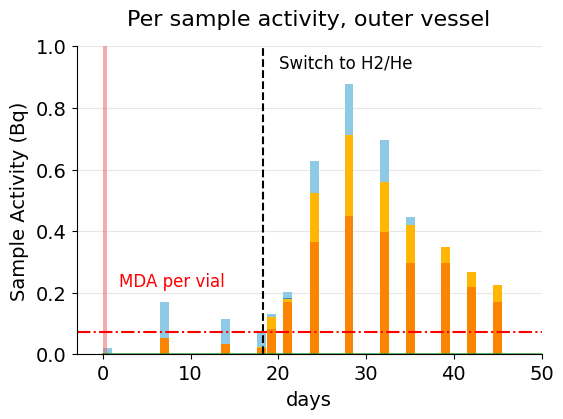

In [16]:
plt.figure(figsize = (6,4))
plot_bars(OV_stream, index=[time.to(ureg.day) for time in replacement_times_walls], bar_width = 1)
plot_sample_activity_wall(baby_model, replacement_times=replacement_times_walls, color="tab:green", label="Model")
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)

plt.grid(True, axis="y", alpha=0.3)
# plt.ylim(bottom=0 * ureg.Bq)
plt.xlim(0, 48)
plt.ylabel("Sample Activity (Bq)", labelpad = 5)
plt.xlabel("days", labelpad = 5)
plt.title("Per sample activity, outer vessel", loc = 'center', pad = 15)

MDA = 0.071 # Calculated by hand for demo, TODO create code to calculate automatically

plt.axvline(x=gas_switch_deltatime, color="k", linestyle="--")
plt.annotate(
    f"Switch to H2/He",
    (gas_switch_deltatime, 0.42),
    xytext=(60, 110),
    textcoords="offset points",
    ha="center",
    va="bottom",
    color="k",
    fontsize = 12
)
plt.axhline(y=MDA, color = "red", linestyle = "-.")
plt.annotate(
    f"MDA per vial",
    (0, MDA),
    xytext=(50, 30),
    textcoords="offset points",
    ha="center",
    va="bottom",
    color="red",
    fontsize = 12
)
plt.ylim(top=1)
plt.xlim(left=-3, right = 50)

plt.show()

In [17]:
tSIE_inst = np.array([
    47.78,
    80.27,
    111.08,
    170.20,
    239.61,
    322.38,
    389.04,
    471.83,
    572.03,
    710.13
])

eff_inst = np.array([
    1.53,
    4.77,
    8.49,
    16.20,
    24.59,
    32.52,
    38.09,
    43.69,
    48.74,
    54.82
])

tSIE_new = np.array([
    38.86,
    68.41,
    95.36,
    123.61,
    152.88,
    179.22,
    206.51,
    234.15,
    260.98,
    288.15,
    313.88,
    342.09,
    370.97,
    398.53,
    425.82,
    456.78,
    486.08,
    516.95,
    566.26,
    611.75
])

eff_new = np.array([
    0.95,
    3.03,
    5.40,
    8.05,
    10.68,
    14.07,
    17.26,
    20.43,
    23.90,
    26.93,
    29.80,
    32.33,
    34.89,
    37.38,
    39.71,
    41.77,
    43.86,
    45.34,
    47.46,
    48.93
])

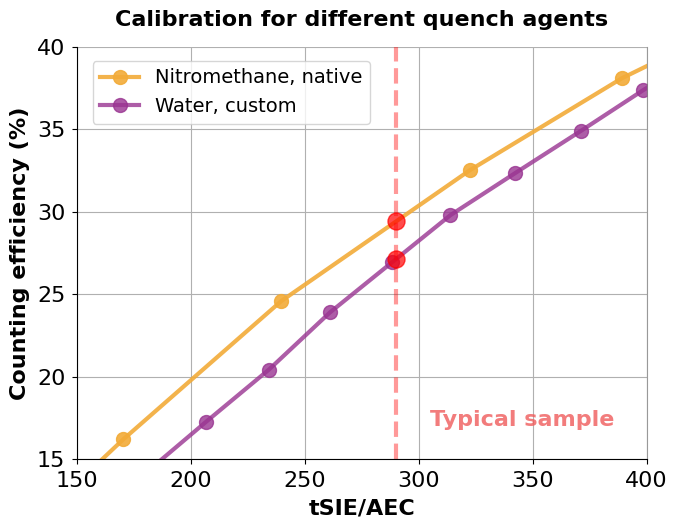

Intersection at x=290:
  Nitromethane: y = 29.42
  Water:        y = 27.14


In [18]:
plt.close('all')

# Interpolate y-values at x = 290
y_inst_290 = np.interp(290, tSIE_inst, eff_inst)
y_new_290 = np.interp(290, tSIE_new, eff_new)

# Create new figure and axis
fig, ax = plt.subplots(figsize=(7, 5.5))

# Plot data
ax.plot(tSIE_inst, eff_inst, marker='o', markersize=10, color="#f2ab38", label="Nitromethane, native", linewidth=3, alpha=0.9)
ax.plot(tSIE_new, eff_new, marker='o', markersize=10, color="#993491", label="Water, custom", linewidth=3, alpha=0.8)

# Vertical dashed line
ax.axvline(x=290, color='red', linestyle='--', linewidth=3, alpha=0.4)

# Mark intersection points
ax.scatter(290, y_inst_290, color="red", s=150, zorder=5, alpha=0.7)
ax.scatter(290, y_new_290, color="red", s=150, zorder=5, alpha=0.7)

# Labels and title
ax.set_title("Calibration for different quench agents", loc='center', pad=15, fontsize=16, weight='bold')
ax.set_xlabel("tSIE/AEC", labelpad=5, fontsize=16, weight='bold')
ax.set_ylabel("Counting efficiency (%)", labelpad=5, fontsize=16, weight='bold')

# Right spine
ax.spines['right'].set_visible(True)
ax.spines['right'].set_color('gray')
ax.spines['right'].set_alpha(0.8)

# Tick padding and label font
ax.tick_params(axis='both', which='major', pad=5, labelsize=16)

# Legend
ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.99), prop={'size': 14})

# Grid and limits
ax.grid(True)
ax.set_xlim([150, 400])
ax.set_ylim([15, 40])

# Coordinates for the arrow and text – tweak as needed
label_x = 305   # x-coordinate of the label
label_y = 17   # y-coordinate of the label

# Add "Neutrons ON" label
ax.text(
    label_x, label_y,
    "Typical sample",
    color=irr_color,
    alpha=0.8,
    fontsize=16,
    weight='bold',
    zorder=5
)

# Save and show
fig.tight_layout()
fig.savefig("Calibration curves.svg", format="svg", dpi=300, transparent=True)
plt.show()

# Print intersection y-values
print(f"Intersection at x=290:")
print(f"  Nitromethane: y = {y_inst_290:.2f}")
print(f"  Water:        y = {y_new_290:.2f}")


In [19]:
29.42-27.14

2.280000000000001

In [20]:
60*16*0.2714

260.544

In [21]:
(60*16*0.2714)/(0.2942*60)

14.76002719238613

In [22]:
((60*18*0.2714)/(0.2942*60))/18

0.9225016995241331

In [23]:
import requests

url_run4_all = "https://raw.githubusercontent.com/veliki-filozof/baby-1L-run-4/refs/heads/main/data/processed_data.json"
run4_data_all = requests.get(url_run4_all).json()

from libra_toolbox.tritium.model import Model

# Build irradiations list using shared ureg
irradiations_run4_all = [
    (
        entry["start_time"]["value"] * ureg(entry["start_time"]["unit"]),
        entry["stop_time"]["value"] * ureg(entry["stop_time"]["unit"]),
    )
    for entry in run4_data_all["irradiations"]
]

# Extract Run 4 cumulative measured data
run4_days_all = run4_data_all["cumulative_tritium_release"]["IV"]["sampling_times"]["value"]
run4_top_release_all = run4_data_all["cumulative_tritium_release"]["IV"]["total"]["value"]
run4_days_wall_all = run4_data_all["cumulative_tritium_release"]["OV"]["sampling_times"]["value"]
run4_wall_release_all = run4_data_all["cumulative_tritium_release"]["OV"]["total"]["value"]

# Construct Run 4 model
baby_model_run4_all = Model(
    radius=run4_data_all["modelled_baby_radius"]["value"] * ureg(run4_data_all["modelled_baby_radius"]["unit"]),
    height=run4_data_all["modelled_baby_height"]["value"] * ureg(run4_data_all["modelled_baby_height"]["unit"]),
    TBR=run4_data_all["TBR_used_in_model"]["value"],
    neutron_rate=run4_data_all["neutron_rate_used_in_model"]["value"] * ureg(run4_data_all["neutron_rate_used_in_model"]["unit"]),
    irradiations=irradiations_run4_all,
    k_top=run4_data_all["k_top"]["value"] * ureg(run4_data_all["k_top"]["unit"]),
    k_wall=run4_data_all["k_wall"]["value"] * ureg(run4_data_all["k_wall"]["unit"]),
)

# Run the model
baby_model_run4_all.run(13 * ureg.day)

/home/codespace/.local/lib/python3.12/site-packages/scipy/integrate/_ivp/base.py:23: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(fun(t, y), dtype=dtype)


/opt/conda/envs/baby-1l-run-3/lib/python3.12/site-packages/labellines/core.py:228: UserWarning: The value at position 0 in `xvals` is outside the range of its associated line (xmin=np.float64(0.0), xmax=np.float64(12.999999999999998), xval=45). Clipping it into the allowed range.
  warnings.warn(


Text(0, 0.5, 'Cumulative activity (Bq)')

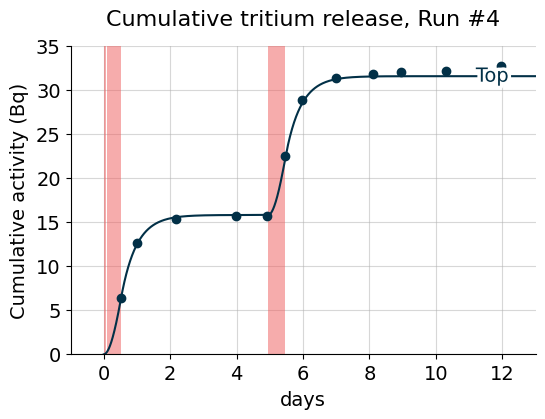

In [24]:
plt.figure(figsize = (6,4))

(l,) = plot_integrated_top_release(baby_model_run4_all, color="#023047", label = 'Top')
#plot_integrated_wall_release(baby_model_run4_all, color="tab:green", label="Wall")
plot_irradiation(baby_model_run4_all, facecolor="#EF5B5B", alpha=0.5)

plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[45] * 2)
plt.ylim(bottom=0 * ureg.Bq)

# Plot measured
plt.scatter(run4_days_all, run4_top_release_all, color="#023047", label="Run 4 Measured (Top)")
#plt.scatter(run4_days_wall_all, run4_wall_release_all, color="tab:green", label="Run 4 Measured (Top)")


plt.title("Cumulative tritium release, Run #4", loc="center", pad = 15)
plt.ylim(top=35)
plt.xlim(left = -1, right = 13)
plt.yticks(np.arange(0, 40, 5))  # Start at 0, end before 25, step by 5
plt.xticks(np.arange(0, 14, 2)) 
plt.xlabel("days", labelpad = 5)
plt.ylabel("Cumulative activity (Bq)", labelpad = 5)


Text(0, 0.5, 'Cumulative activity (Bq)')

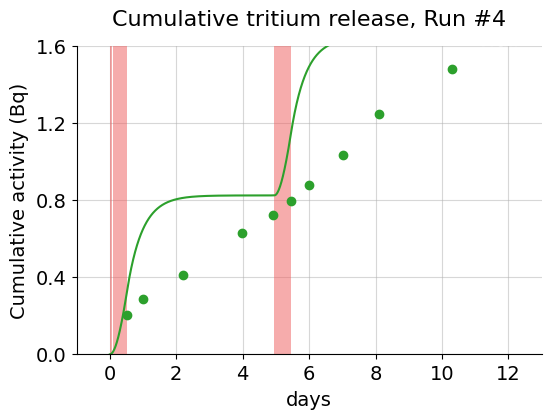

In [25]:
plt.figure(figsize = (6,4))

#plot_integrated_top_release(baby_model_run4_all, color="#023047", label = 'Top')
(l,) = plot_integrated_wall_release(baby_model_run4_all, color="tab:green", label="Wall")
plot_irradiation(baby_model_run4_all, facecolor="#EF5B5B", alpha=0.5)

plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[45] * 2)
plt.ylim(bottom=0 * ureg.Bq)

# Plot measured
#plt.scatter(run4_days_all, run4_top_release_all, color="#023047", label="Run 4 Measured (Top)")
plt.scatter(run4_days_wall_all, run4_wall_release_all, color="tab:green", label="Run 4 Measured (Top)")


plt.title("Cumulative tritium release, Run #4", loc="center", pad = 15)
plt.ylim(top=1.6)
plt.xlim(left = -1, right = 13)
plt.yticks(np.arange(0, 1.7, 0.4))  # Start at 0, end before 25, step by 5
plt.xticks(np.arange(0, 14, 2)) 
plt.xlabel("days", labelpad = 5)
plt.ylabel("Cumulative activity (Bq)", labelpad = 5)


0.0 day


Text(0, 0.5, 'Cumulative activity (Bq)')

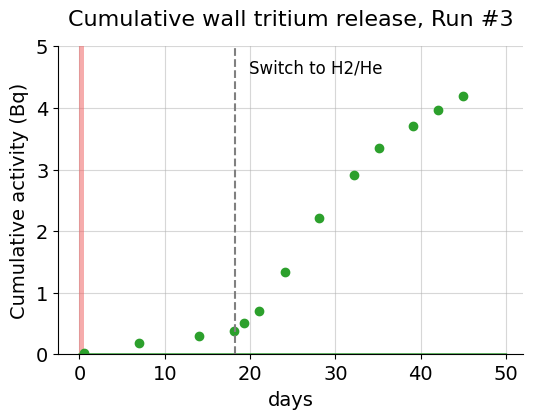

In [26]:
plt.figure(figsize = (6,4))
#plot_integrated_top_release(baby_model, color="#023047", label = "Top")
(l,) = plot_integrated_wall_release(baby_model, color="tab:green")
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)

plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[45] * 2)
plt.ylim(bottom=0 * ureg.Bq)

plt.scatter(
    replacement_times_walls,
    OV_stream.get_cumulative_activity("total"),
    color="tab:green",
)


ydata = l.get_ydata()
xdata = l.get_xdata()
target_release_frac = 0.99
x_target = xdata[np.argmax(ydata > target_release_frac * ydata[-1])]
print(f'{x_target}')
# plt.axvline(x=x_target, color="k", linestyle="--")
plt.axvline(x=gas_switch_deltatime, color="gray", linestyle="--")
#plt.annotate(
#    f"99% of steady state \n {x_target: .0f}",
#    (x_target, target_release_frac * ydata[-1]),
#    xytext=(0, 20),
#    textcoords="offset points",
#    ha="center",
#    va="bottom",
#    color="k",
#)
plt.annotate(
    f"Switch to H2/He",
    (x_target, target_release_frac * ydata[-1]),
    xytext=(170, 200),
    textcoords="offset points",
    ha="center",
    va="bottom",
    color="k",
    fontsize = 12
)

plt.title("Cumulative wall tritium release, Run #3", loc="center", pad = 15)
plt.ylim(top=5)
plt.xlim(right = 52)
plt.yticks(np.arange(0, 5.5, 1))  # Start at 0, end before 25, step by 5
plt.xlabel("days", labelpad = 5)
plt.ylabel("Cumulative activity (Bq)", labelpad = 5)

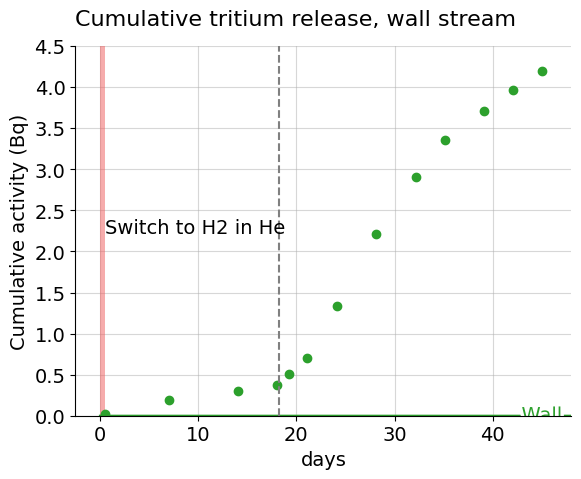

In [27]:
plt.figure()
plot_integrated_wall_release(baby_model, color="tab:green", label="Wall")
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[45]*2)
plt.ylim(bottom=0 * ureg.Bq)

plt.scatter(
    replacement_times_walls,
    OV_stream.get_cumulative_activity("total"),
    color="tab:green",
)

plt.axvline(x=gas_switch_deltatime, color="grey", linestyle="--")
plt.annotate(
    f"Switch to H2 in He",
    (gas_switch_deltatime, 2.0),
    xytext=(-60, 10),
    textcoords="offset points",
    ha="center",
    va="bottom",
    color="black",
)

plt.title("Cumulative tritium release, wall stream", loc="left", pad = 15)
plt.ylim(top=4.5)
plt.xlim(right = 48)
plt.xlabel("days")
plt.ylabel("Cumulative activity (Bq)")

plt.savefig("cumulative_release.pdf", bbox_inches="tight")

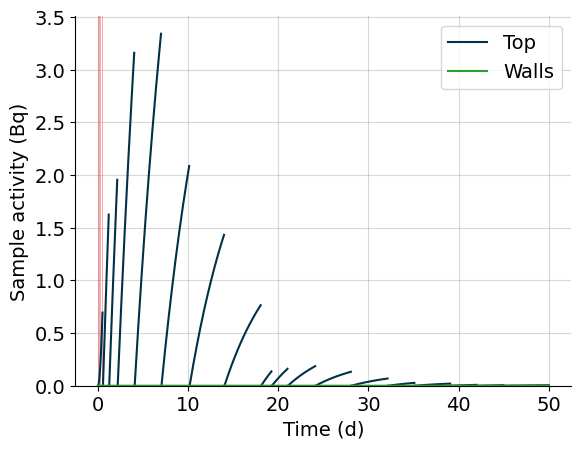

In [28]:
plot_sample_activity_top(
    baby_model, replacement_times=replacement_times_top, color="#023047", label="Top"
)
plot_sample_activity_wall(
    baby_model,
    replacement_times=replacement_times_walls,
    color="tab:green",
    label="Walls",
)
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.ylim(bottom=0 * ureg.Bq)

plt.ylabel(f"Sample activity ({plt.gca().yaxis.get_units():~P})")
plt.xlabel(f"Time ({plt.gca().xaxis.get_units():~P})")
plt.legend()
plt.grid(alpha=0.5)

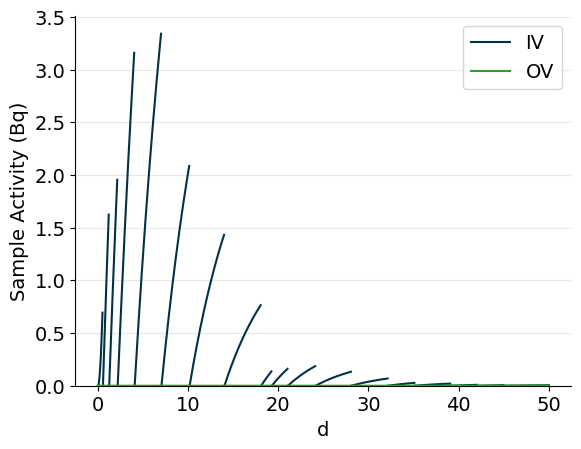

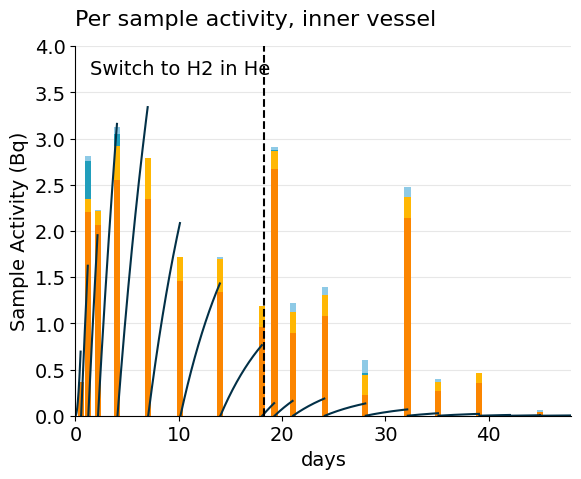

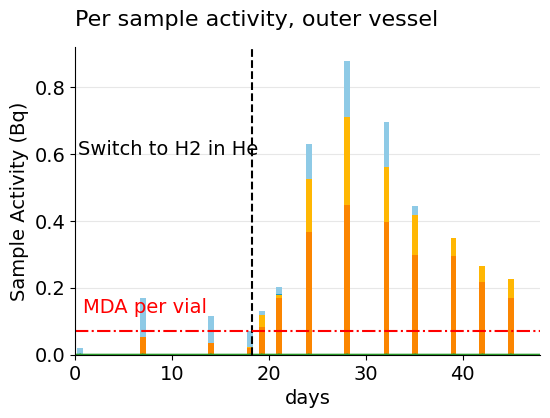

In [29]:
plt.figure()
plot_sample_activity_top(
    baby_model, replacement_times=replacement_times_top, color="#023047", label="IV"
)
plot_sample_activity_wall(
    baby_model, replacement_times=replacement_times_walls, color="tab:green", label="OV"
)
plt.grid(True, axis="y", alpha=0.3)
plt.ylim(bottom=0 * ureg.Bq)
plt.ylabel("Sample Activity (Bq)")
plt.legend()

plt.figure()
plot_bars(IV_stream, index=[time.to(ureg.day) for time in replacement_times_top], bar_width = 0.6)
plot_sample_activity_top(baby_model, replacement_times=replacement_times_top, color="#023047", label="Model")

plt.grid(True, axis="y", alpha=0.3)
plt.ylim(bottom=0 * ureg.Bq)
plt.xlim(0, 48)
plt.ylim(top=4)
plt.ylabel("Sample Activity (Bq)")
plt.xlabel("days")
plt.title("Per sample activity, inner vessel", loc = 'left', pad = 15)

plt.axvline(x=gas_switch_deltatime, color="k", linestyle="--")
plt.annotate(
    f"Switch to H2 in He",
    (gas_switch_deltatime, 3.5),
    xytext=(-60, 10),
    textcoords="offset points",
    ha="center",
    va="bottom",
    color="k",
)

plt.figure(figsize = (6,4))
plot_bars(OV_stream, index=[time.to(ureg.day) for time in replacement_times_walls], bar_width = 0.6)
plot_sample_activity_wall(baby_model, replacement_times=replacement_times_walls, color="tab:green", label="Model")

plt.grid(True, axis="y", alpha=0.3)
# plt.ylim(bottom=0 * ureg.Bq)
plt.xlim(0, 48)
plt.ylabel("Sample Activity (Bq)")
plt.xlabel("days")
plt.title("Per sample activity, outer vessel", loc = 'left', pad = 15)

MDA = 0.071 # Calculated by hand for demo, TODO create code to calculate automatically

plt.axvline(x=gas_switch_deltatime, color="k", linestyle="--")
plt.annotate(
    f"Switch to H2 in He",
    (gas_switch_deltatime, 0.42),
    xytext=(-60, 40),
    textcoords="offset points",
    ha="center",
    va="bottom",
    color="k",
)
plt.axhline(y=MDA, color = "red", linestyle = "-.")
plt.annotate(
    f"MDA per vial",
    (0, MDA),
    xytext=(50, 10),
    textcoords="offset points",
    ha="center",
    va="bottom",
    color="red",
)

plt.show()

## How did $k_\mathrm{top}$ improve compared to run 1

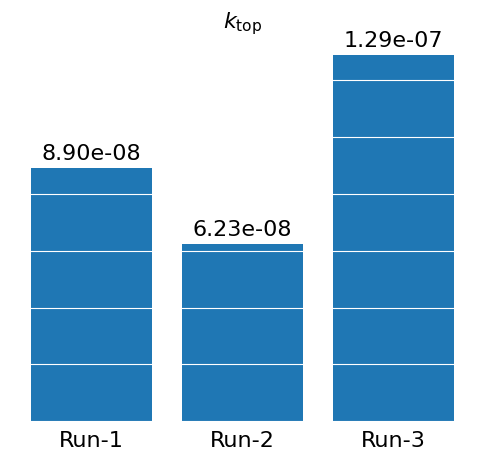

In [30]:
import requests

url = "https://raw.githubusercontent.com/LIBRA-project/BABY-1L-run-1/refs/tags/v0.5/data/processed_data.json"
response = requests.get(url)
data_run_1 = response.json()

url = "https://raw.githubusercontent.com/LIBRA-project/BABY-1L-run-2/refs/tags/v0.3/data/processed_data.json"
response = requests.get(url)
data_run_2 = response.json()

plt.figure(figsize=(6, 5))
bars = plt.bar(
    [0, 1, 2],
    [data_run_1["k_top"]["value"], data_run_2["k_top"]["value"], k_top.magnitude],
    tick_label=["Run-1", "Run-2", "Run-3"],
)

plt.bar_label(bars, fontsize=16, fmt="%.2e", padding=3)
plt.title(r"$k_\mathrm{top}$", weight="bold", fontsize=16)
plt.ylabel("")
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels
plt.gca().tick_params(axis="both", which="both", left=False, bottom=False, labelsize=16)
plt.gca().set_axisbelow(False)
plt.grid(axis="y", alpha=1, color="white", zorder=-10)
plt.show()

In [31]:
def model_from_json(json_data: dict) -> Model:
    """
    Create a model from JSON data.
    """
    # Extract the relevant data from the JSON
    k_top = json_data["k_top"]["value"] * ureg(json_data["k_top"]["unit"])
    k_wall = json_data["k_wall"]["value"] * ureg(json_data["k_wall"]["unit"])
    neutron_rate = json_data["neutron_rate_used_in_model"]["value"] * ureg(
        json_data["neutron_rate_used_in_model"]["unit"]
    )
    irradiations = [
        (
            irr["start_time"]["value"] * ureg(irr["start_time"]["unit"]),
            irr["stop_time"]["value"] * ureg(irr["stop_time"]["unit"]),
        )
        for irr in json_data["irradiations"]
    ]

    # Create a new model instance with the extracted parameters
    model = Model(
        radius=json_data["modelled_baby_radius"]["value"]
        * ureg(json_data["modelled_baby_radius"]["unit"]),
        height=json_data["modelled_baby_height"]["value"]
        * ureg(json_data["modelled_baby_height"]["unit"]),
        TBR=json_data["TBR_used_in_model"]["value"]
        * ureg(json_data["TBR_used_in_model"]["unit"]),
        k_top=k_top,
        k_wall=k_wall,
        neutron_rate=neutron_rate,
        irradiations=irradiations,
    )

    return model

/home/codespace/.local/lib/python3.12/site-packages/scipy/integrate/_ivp/base.py:23: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(fun(t, y), dtype=dtype)


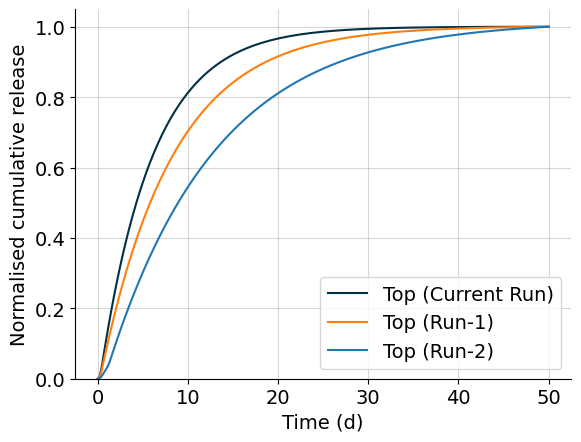

In [32]:
from libra_toolbox.tritium.plotting import COLLECTION_VOLUME, LSC_SAMPLE_VOLUME

def plot_normalised_integrated_top(model, **kwargs):
    integrated_top = quantity_to_activity(model.integrated_release_top()).to(ureg.Bq)
    sample_activity_top = integrated_top / COLLECTION_VOLUME * LSC_SAMPLE_VOLUME

    normalised_top = sample_activity_top / sample_activity_top[-1]

    l = plt.plot(model.times.to(ureg.day), normalised_top, **kwargs)
    return l

plt.figure()

# current run
l = plot_normalised_integrated_top(
    baby_model, color="#023047", label="Top (Current Run)"
)

# run 1
model_run_1 = model_from_json(data_run_1)
model_run_1.run(50 * ureg.day)

l = plot_normalised_integrated_top(model_run_1, color="tab:orange", label="Top (Run-1)")

# run 2
model_run_2 = model_from_json(data_run_2)
model_run_2.run(50 * ureg.day)

l = plot_normalised_integrated_top(model_run_2, color="tab:blue", label="Top (Run-2)")

plt.ylim(bottom=0)
plt.grid(alpha=0.5)
plt.legend()

plt.ylabel("Normalised cumulative release")
plt.xlabel(f"Time ({plt.gca().xaxis.get_units():~P})")

plt.show()
